In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from matplotlib import style
from sklearn.datasets import load_digits

In [2]:
x_data, y_data = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(x_data.shape[0])
x_data = x_data[permutation]
y_data = y_data[permutation]
x_data = x_data.reshape((x_data.shape[0], -1))


In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=0.9, test_size=0.1
)

In [4]:
train_sample = np.size(x_train)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
classification = LogisticRegression()
classification.fit(x_train, y_train)

e:\IIIT-G\0CS360 - Machine Learning Lab\mlpython\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Text(0.5, 0.98, 'Classification vector  accurancy = 91.74285714285715 %')

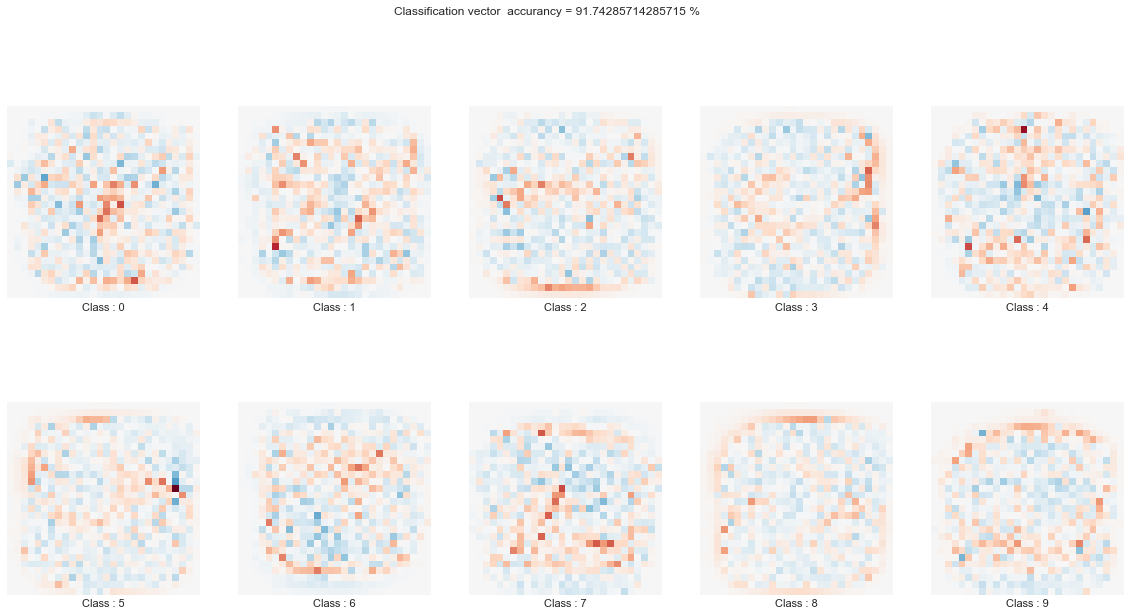

In [7]:
style.use('seaborn')
coefficient = classification.coef_.copy()
plt.figure(figsize=(20, 10))
predict = classification.predict(x_test)
acccurany = classification.score(x_test,y_test)
scale = np.abs(coefficient).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coefficient[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel(f"Class : {i}")
plt.suptitle(f"Classification vector  accurancy = {acccurany*100} %")

